In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\index.csv')

In [3]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.tail()

,date,datetime,cash_type,card,money,coffee_name
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate
895,2024-06-30,2024-06-30 21:04:09.746,card,ANON-0000-0000-0097,32.82,Americano with Milk


In [5]:
df['card'].nunique()

337

In [6]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
df['card']=df['card'].fillna(df['card'].mode)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         896 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


In [9]:
df['cash_type'].value_counts()

cash_type
card    807
cash     89
Name: count, dtype: int64

In [10]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: count, dtype: int64

In [11]:
df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

coffee_name
Latte                  7151.62
Americano with Milk    6738.14
Cappuccino             6253.50
Americano              3786.42
Cortado                2422.80
Hot Chocolate          2417.46
Cocoa                   995.66
Espresso                827.34
Name: money, dtype: float64

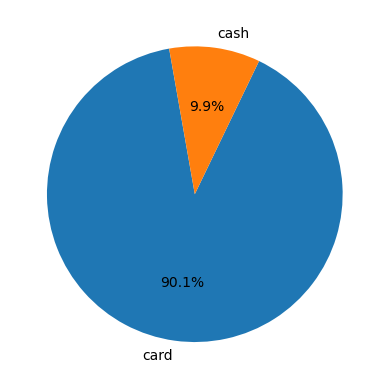

In [12]:
count=df['cash_type'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

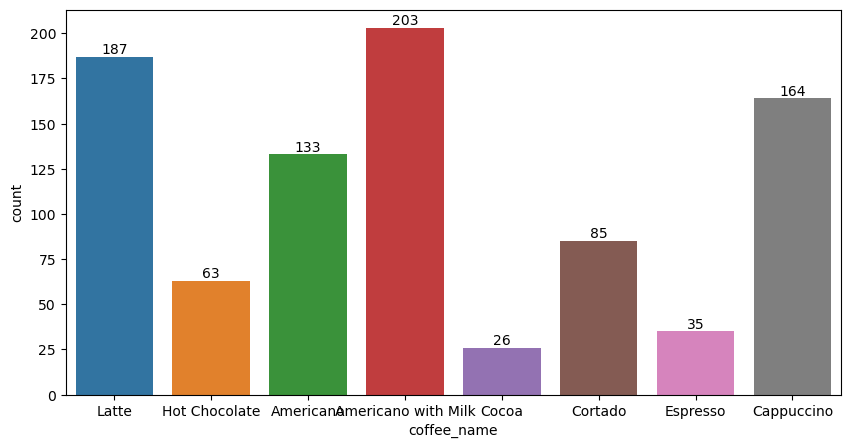

In [13]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df, x='coffee_name', hue='coffee_name')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

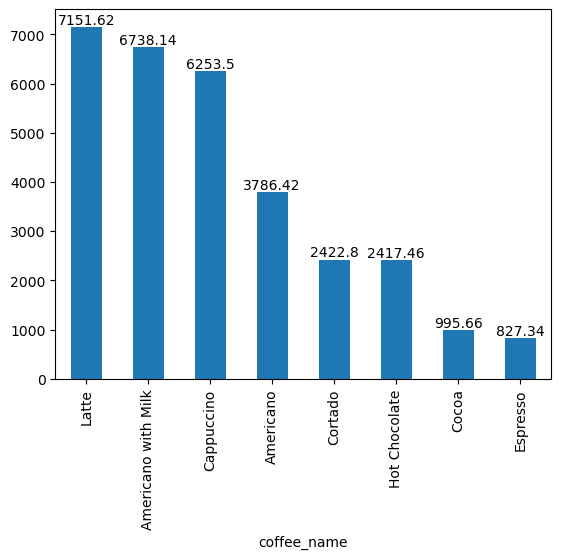

In [14]:
ax=df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [15]:
datetime_columns=["date","datetime"]
for col in datetime_columns:
    df[col]=pd.to_datetime(df[col])

In [16]:
df['year']=df['date'].dt.strftime('%Y')
df['month']=df['date'].dt.strftime('%m')
df['day']=df['date'].dt.strftime('%w')
df['time'] = df['datetime'].dt.strftime('%I-%p')

df.head()

,date,datetime,cash_type,card,money,coffee_name,year,month,day,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,03,5,10-AM
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,03,5,12-PM
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,03,5,12-PM
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,03,5,01-PM
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,03,5,01-PM


In [17]:
monthly_sales=df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales


coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,03,36,34,20,6,30,10,22,48
1,04,35,42,43,6,19,7,13,31
2,05,48,58,55,9,17,8,14,58
3,06,14,69,46,5,19,10,14,50


<Axes: >

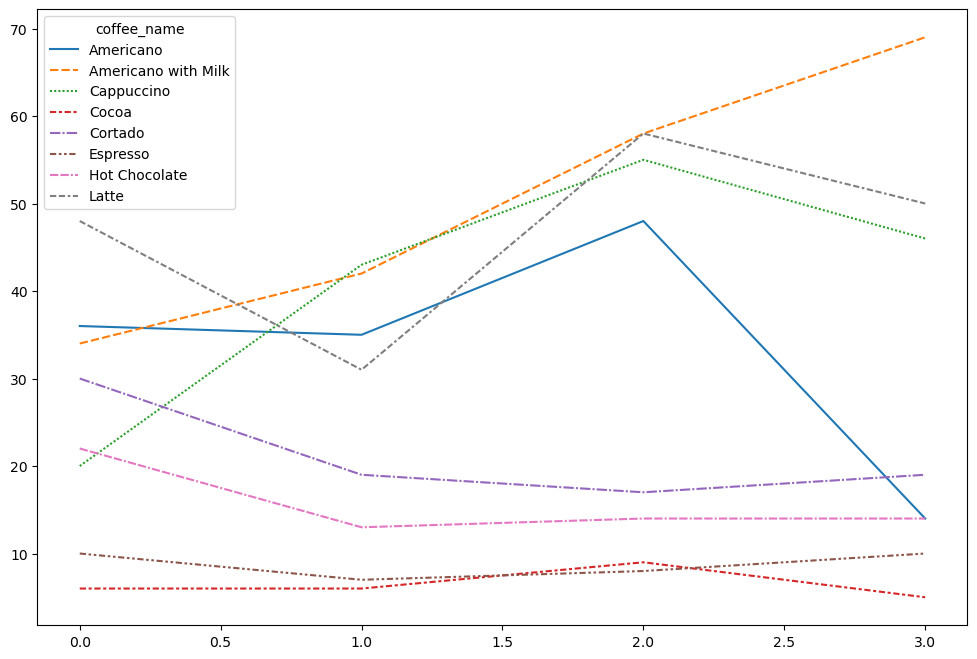

In [18]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_sales)

In [19]:
weekday_sales = df.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,127
1,1,127
2,2,136
3,3,118
4,4,137
5,5,124
6,6,127


([<matplotlib.axis.XTick at 0x2505b7c7c80>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

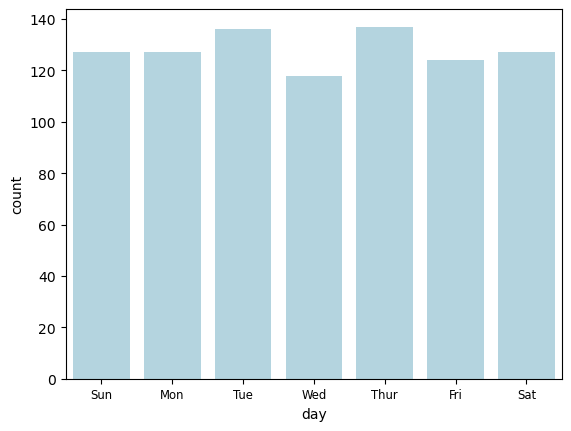

In [20]:
sns.barplot(data=weekday_sales,x='day',y='count',color='lightblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

In [21]:
hourly_sale=df.groupby('time').count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sale

,time,count
0,01-PM,66
1,02-PM,65
2,03-PM,59
3,04-PM,63
4,05-PM,66
5,06-PM,69
6,07-AM,8
7,07-PM,81
8,08-AM,26
9,08-PM,42


<Axes: xlabel='time', ylabel='count'>

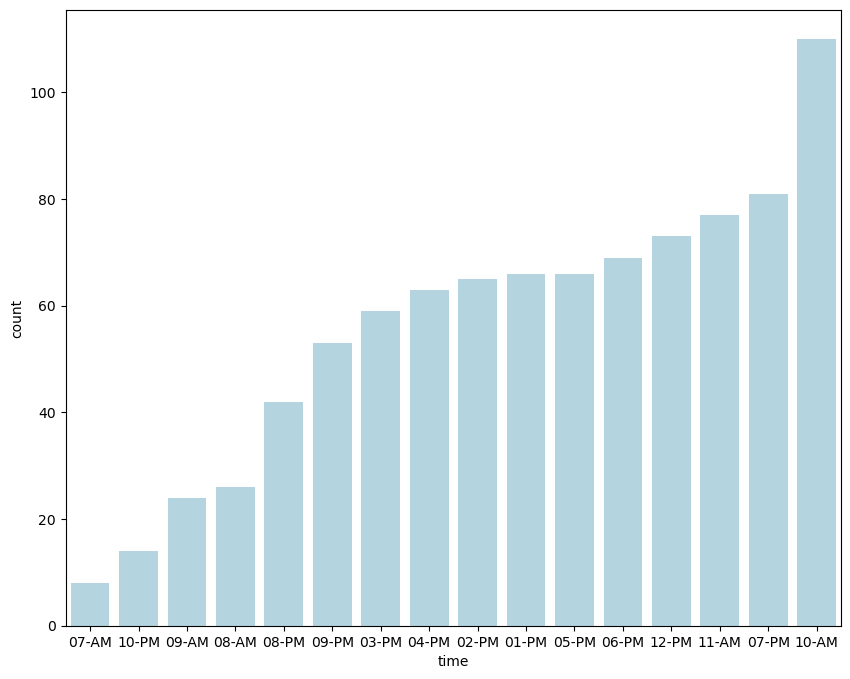

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=hourly_sale.sort_values(by='count', ascending=True),x='time',y='count',color='lightblue')

In [23]:
hourly_sales_by_coffee=df.groupby(['time','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='time',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,time,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,01-PM,18.0,13.0,10.0,1.0,11.0,3.0,4.0,6.0
1,02-PM,13.0,17.0,13.0,2.0,6.0,3.0,1.0,10.0
2,03-PM,14.0,13.0,7.0,0.0,3.0,4.0,6.0,12.0
3,04-PM,10.0,12.0,10.0,3.0,11.0,4.0,4.0,9.0
4,05-PM,8.0,9.0,14.0,4.0,5.0,4.0,7.0,15.0
5,06-PM,9.0,16.0,9.0,2.0,5.0,3.0,10.0,15.0
6,07-AM,4.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
7,07-PM,3.0,16.0,29.0,2.0,4.0,1.0,8.0,18.0
8,08-AM,5.0,4.0,7.0,0.0,4.0,0.0,0.0,6.0
9,08-PM,1.0,8.0,12.0,5.0,3.0,2.0,5.0,6.0


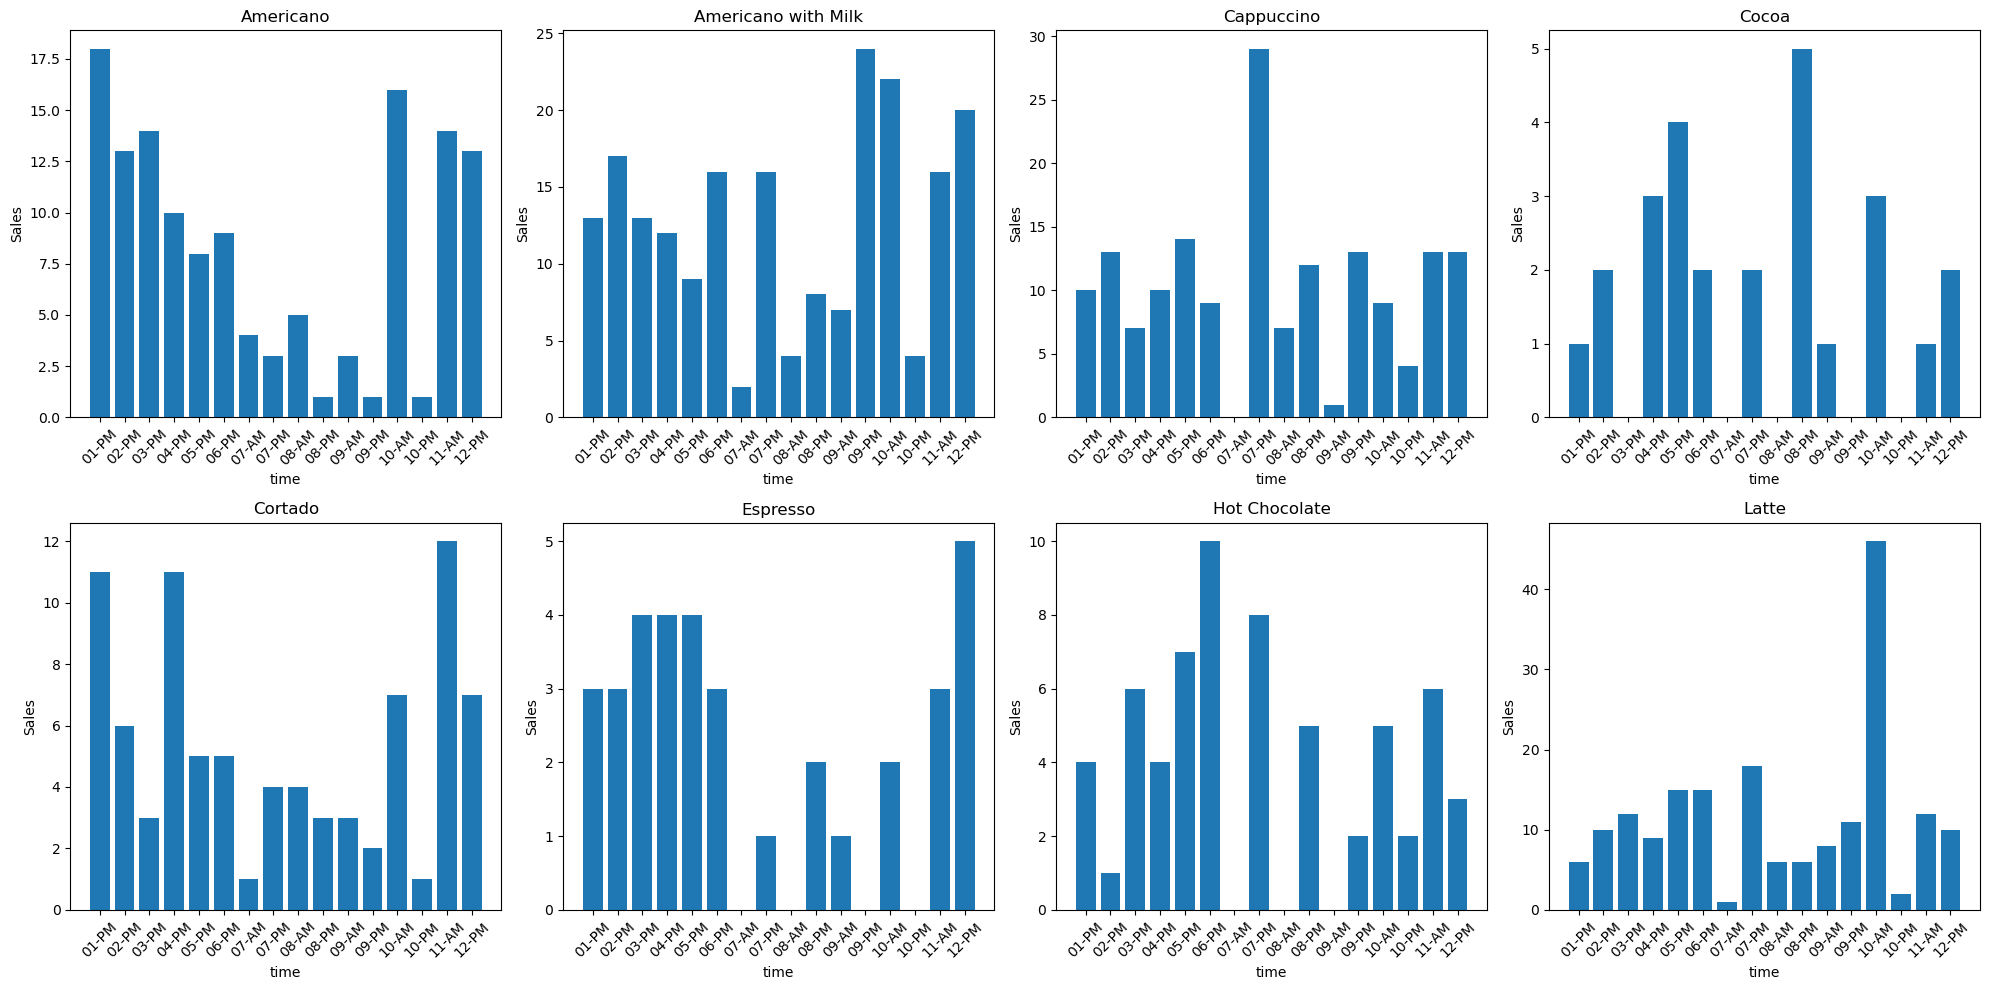

In [24]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]): 
    axs[i].bar(hourly_sales_by_coffee['time'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('time')
    axs[i].set_ylabel('Sales')
    axs[i].tick_params(axis='x', rotation=45)
   
    
plt.tight_layout()

plt.show()